Importando bibliotecas ```pandas``` e ```matpltlib``` para logo em seguida ler o data set ```googleplaystore.csv```. 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('googleplaystore.csv')

#### **Demanda 1:** Gráfico de barras dos Top 5 apps por número de instalação.
O script abaixo **separa apenas as colunas** ```App``` e ```Installs```, **filtra a linha defeituosa** e prepara os dados para o gráfico, **transforma em numéricos** os valores da coluna ```Installs```, **coloca esses valores em ordem cresente** e **retira os duplicados**. No final é gerado o gráfico de barras.

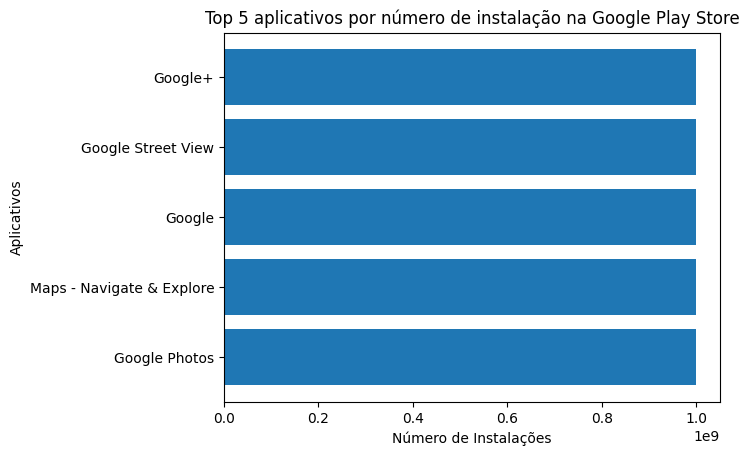

In [16]:
df_top5 = df[['App','Installs']]
df_top5 = df_top5.loc[df_top5['Installs'] != 'Free']
df_top5['Installs'] = df_top5['Installs'].str.rstrip('+').str.replace(',', '')
df_top5['Installs'] = pd.to_numeric(df_top5['Installs'], errors='coerce')
df_top5 = df_top5.sort_values('Installs', ascending=False)
df_top5 = df_top5.drop_duplicates(subset=['App'])
df_top5 = df_top5.head()

#Imprime o gráfico
plt.barh(df_top5['App'],df_top5['Installs'])
plt.title('Top 5 aplicativos por número de instalação na Google Play Store')
plt.xlabel('Número de Instalações')
plt.ylabel('Aplicativos')
plt.show()

#### **Demanda 2:** Gráfico de pizza mostrando a frequência de categorias dos apps.
O script abaixo primeiro faz uma formatação para **retirar os underlines dos textos da coluna ```Category```** e armazena a **frequência de aparição das categorias**, depois disso prepara os valores para o gráfico, armazenando em uma variável a **porcentagem dessa frequência**. Para uma melhor legibilidade do gráfico, **valores abaixo de 2% são agrupados** em um único pedaço. Ao final, o gráfico é gerado.

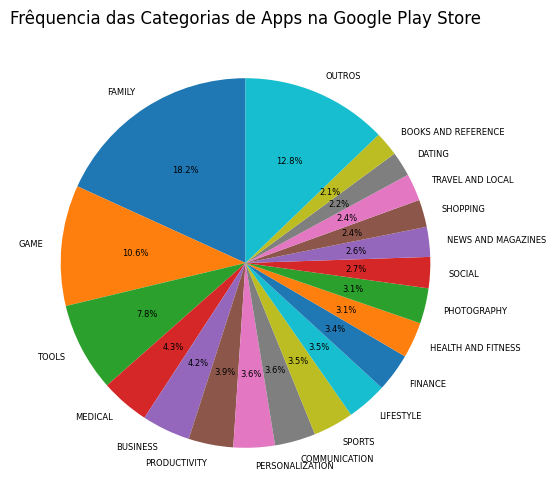

In [17]:
freq_categorias = df['Category'].str.replace('_', ' ').value_counts()
perc_categorias = freq_categorias/freq_categorias.sum() * 100
freq_categorias = perc_categorias[perc_categorias >= 2]
freq_categorias['OUTROS'] = perc_categorias[perc_categorias < 2].sum()

plt.figure(figsize=(10, 6))
plt.pie(freq_categorias, labels=freq_categorias.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6})
plt.title('Frêquencia das Categorias de Apps na Google Play Store')
plt.show()

#### **Demanda 3:** App mais caro do dataframe.
De forma bem simples, o script abaixo **armazena uma cópia de todo o dataframe**, pois queremos todas as informações do aplicativo. Após isso, ele **passa os valores da coluna ```Price``` para números** e dentro da própria função **retira os cifrões** que atrapalham nessa conversão. Por fim, ele **ordena os valores pelo preço** e **exibe apenas o primeiro da lista**.

In [18]:
df_mais_caro = df.copy()
df_mais_caro['Price'] = pd.to_numeric(df_mais_caro['Price'].str.replace('$', ''), errors='coerce')
df_mais_caro = df_mais_caro.sort_values('Price', ascending=False)
df_mais_caro.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


#### **Demanda 4:** Quantidade de apps classificados como "Mature 17+" dentro do dataframe.
O script abaixo **localiza todas as linhas que contenham a classificação "Mature 17+" na coluna ```Content Rating```**, depois **armazena em uma variável a quantidade de linhas filtradas** e, ao final, **imprime essa quantidade em uma mensagem**.

In [19]:
df_mature = df.loc[df['Content Rating'] == 'Mature 17+']
count_mature = df_mature.shape[0]
print(f'Temos {count_mature} apps com a categoria "Mature 17+"')

Temos 499 apps com a categoria "Mature 17+"


#### **Demanda 5:** Mostre uma lista com os Top 10 apps por número de reviews.
O script primeiro **faz uma cópia das colunas ```App``` e ```Reviews```** do dataframe, depois **transforma os valores da coluna ```Reviews``` em inteiros**, após isso **retira os valores duplicados da coluna ```App```** (Pois por algum motivo temos uma repetição de aplicativos com números de reviews diferentes) e por fim **ordena as linhas em ordem decrescente** e **mostra apenas as 10 primeiras delas**.

In [20]:
df_reviews = df[['App', 'Reviews']].copy()
df_reviews['Reviews'] = pd.to_numeric(df_reviews['Reviews'], errors='coerce')
df_reviews = df_reviews.drop_duplicates(subset=['App'])
df_reviews = df_reviews.sort_values('Reviews', ascending=False)[['App','Reviews']]
df_reviews.head(10)

,App,Reviews
2544,Facebook,78158306.0
336,WhatsApp Messenger,69119316.0
2545,Instagram,66577313.0
335,Messenger – Text and Video Chat for Free,56642847.0
1670,Clash of Clans,44891723.0
4005,Clean Master- Space Cleaner & Antivirus,42916526.0
1654,Subway Surfers,27722264.0
3665,YouTube,25655305.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
1660,Clash Royale,23133508.0


#### **Demanda 6 e 7:** Cálculos criados e seus gráficos.


##### **Cálculo apresentado em valor:** Quantidades de aplicativos gratuitos e pagos no dataframe.
Aqui, o script **guarda em duas variáveis as linhas dos jogos pagos e gratuitos**, e em outras duas, a quantidade de cada um.  Após isso, ele **armazena os valores em uma lista** para poder ser passado na criação do gráfico, que no caso, foi escolhido um **gráfico de dispersão**.

No data frame do Google Play Store temos 10039 apps gratuítos e 800 apps pagos.


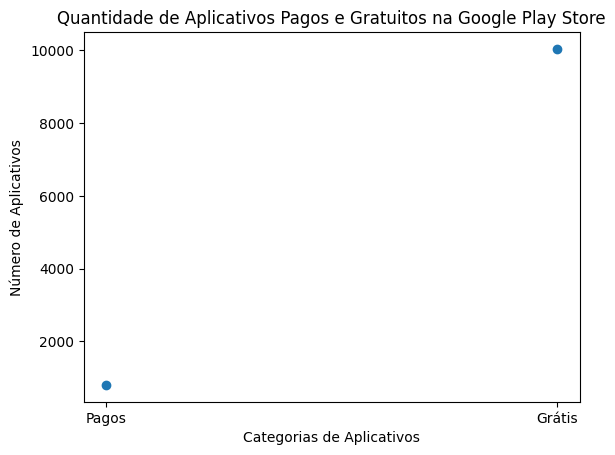

In [21]:
df_pagos = df.loc[df['Type'] == 'Paid']
count_paid = int(df_pagos.shape[0])
df_gratis = df.loc[df['Type'] == 'Free']
count_free = int(df_gratis.shape[0])

print(f'No data frame do Google Play Store temos {count_free} apps gratuítos e {count_paid} apps pagos.')

categorias = ['Pagos','Grátis']
valores = [count_paid,count_free]

plt.scatter(categorias,valores)
plt.title('Quantidade de Aplicativos Pagos e Gratuitos na Google Play Store')
plt.xlabel('Categorias de Aplicativos')
plt.ylabel('Número de Aplicativos')
plt.show()

##### **Cálculo apresentado em lista:** Top 10 apps mais mal avaliados do dataframe.
Nesse script, primeiro os **valores da coluna ```Rating``` são passados para inteiros**, depois, para resultados mais interessantes, **são retirados os valores duplicados**, já que muitas avaliações se repetem, deixando o gráfico estático. Após isso, os **valores da coluna ```Rating``` são ordenados em ordem crescente** e ao final, **são separadas apenas as 10 primeiras linhas das colunas ```Apps``` e ```Rating``` para servirem como os eixos do gráfico de linha desse cálculo**.

                                 App  Rating
625          House party - live chat     1.0
10082                     EY TaxChat     1.2
6008                 BD Provider App     1.4
7126                CB Mobile Access     1.5
4905         AC REMOTE UNIVERSAL-PRO     1.6
4006                         C by GE     1.7
4161                     G-Playlists     1.8
518    Just She - Top Lesbian Dating     1.9
4010     Bridge-C - Get More Storage     2.0
5908               AZ REMOTE CONTROL     2.1


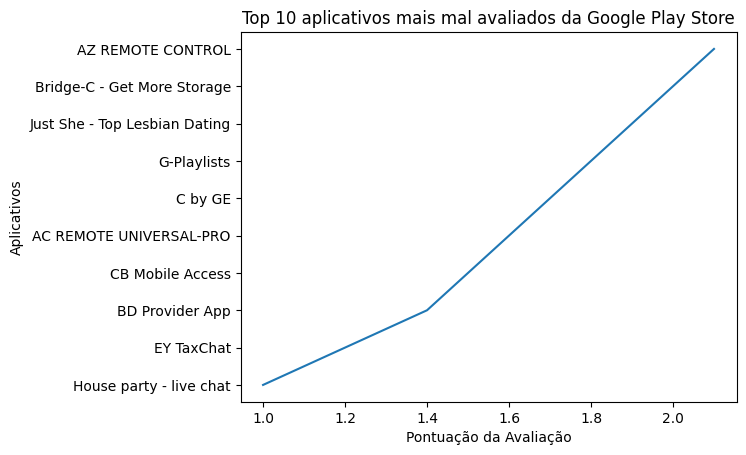

In [22]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df= df.drop_duplicates(subset=['Rating'])
df = df.sort_values('Rating')[['App','Rating']]
df_rating = df.head(10)
print(df_rating)

plt.plot(df_rating['Rating'],df_rating['App'])
plt.title('Top 10 aplicativos mais mal avaliados da Google Play Store')
plt.ylabel('Aplicativos')
plt.xlabel('Pontuação da Avaliação')
plt.show()